# Laboratorio 2 - Taller IA: Implementación del Algoritmo DBSCAN.

### Nombre: Matías Jesús Egaña Alfaro. 
### Rut: 20.457.413-8. 
### Profesor: Humberto Farias Aroca.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [8]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/prostate.csv"
data = pd.read_csv(url)

El conjunto de datos utilizado contiene información sobre pacientes que de cancer de prostata. Cada fila representa datos de un paciente diferente. Las características incluyen el volumen del cáncer, el peso de la próstata, la edad del paciente, la hiperplasia prostática benigna, la invasión de la vesícula seminal, la penetración capsular, el puntaje de Gleason y el porcentaje de puntaje de Gleason 4 o 5. La variable de respuesta es el nivel de antígeno específico de la próstata (lpsa).

In [9]:
numeric_patients = data.select_dtypes(include=[np.number])

In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_patients)

In [12]:
eps_values = [0.1, 0.5, 1.0, 2.0]
min_samples_values = [3, 5, 10, 20]

In [13]:
best_score = -1
best_eps = None
best_min_samples = None
best_clusters = None

Y colocamos estas variables que se utilizarán para almacenar los mejores resultados obtenidos durante la búsqueda de hiperparámetros.

##### best_score: Almacena el mejor puntaje de silueta encontrado hasta el momento durante la búsqueda de hiperparámetros. Se inicializa en -1 para garantizar que cualquier puntaje de silueta encontrado sea mayor o igual a este valor.

##### best_eps: Almacena el valor de eps que produce el mejor puntaje de silueta encontrado hasta el momento. Se inicializa en None para indicar que aún no se ha encontrado el mejor valor de eps

##### best_min_samples: Almacena el valor de min_samples que produce el mejor puntaje de silueta encontrado hasta el momento. Se inicializa en None para indicar que aún no se ha encontrado el mejor valor de min_samples.

##### best_clusters: Almacena los clusters generados por DBSCAN que producen el mejor puntaje de silueta encontrado hasta el momento. Se inicializa en None para indicar que aún no se han encontrado los mejores clusters.

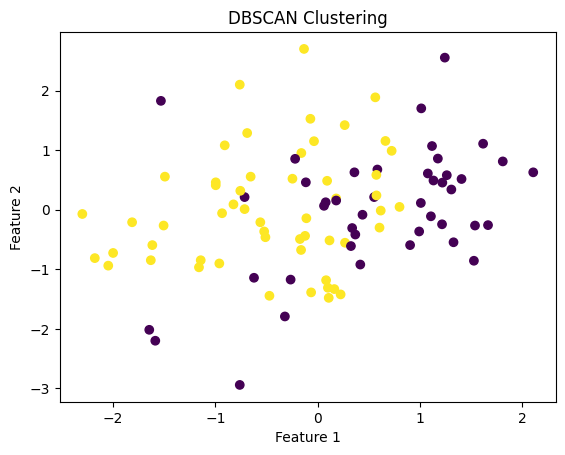

Mejores hiperparámetros:
EPS: 2.0
Min_samples: 10


In [14]:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_scaled)
        try:
            silhouette_score = metrics.silhouette_score(data_scaled, clusters)
            if silhouette_score > best_score:
                best_score = silhouette_score
                best_eps = eps
                best_min_samples = min_samples
                best_clusters = clusters
        except:
            continue

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_clusters = dbscan.fit_predict(data_scaled)

plt.scatter(data_scaled[:,0], data_scaled[:,1], c=best_clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show() 

print("Mejores hiperparámetros:")
print("EPS:", best_eps)
print("Min_samples:", best_min_samples)